## Etapa 1: Instando o TensorFlow 2.0

In [ ]:
!pip uninstall -y tensorflow #Comando necessário, pois o TensorFlow-gpu não desinstala a versão mais recente do Tensorflow, pode gerar conflitos.

Found existing installation: tensorflow 2.8.2+zzzcolab20220527125636
Uninstalling tensorflow-2.8.2+zzzcolab20220527125636:
  Successfully uninstalled tensorflow-2.8.2+zzzcolab20220527125636


In [ ]:
!pip install tensorflow-gpu==2.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 380.8 MB 40 kB/s 
     |████████████████████████████████| 50 kB 8.3 MB/s 
     |████████████████████████████████| 449 kB 52.7 MB/s 
     |████████████████████████████████| 3.8 MB 58.4 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=e0ed78ac3929f0d84c2dec9f32586bcef41641791aa9d4bbecf4c7f21cbcf21f
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting un

## Etapa 2: Importando as bibliotecas

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import cifar10
import pandas as pd

%matplotlib inline
tf.__version__

'2.0.0'

## Etapa 3: Pré-processamento

### Carregando a base de dados Cifar10

In [ ]:
# Configurando o nome das classes que serão previstas
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
# Carregando a base de dados
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [ ]:
amostragem  = pd.read_csv("/content/amostragem_compressiva_cifar.csv",header = None )

In [ ]:
X_train.shape


(50000, 32, 32, 3)

### Normalização das imagens

In [ ]:
amostragem = amostragem.to_numpy()
X_train = X_train / 255.0
X_train_R = X_train[: ,:, :, 0]
X_train_G = X_train[: ,:, :, 1]
X_train_B = X_train[: ,:, :, 2]
X_train_R = X_train_R.reshape(50000,1024)
X_train_G = X_train_G.reshape(50000,1024)
X_train_B = X_train_B.reshape(50000,1024)
mod_X_train_R = X_train_R.dot(amostragem)
mod_X_train_G = X_train_G.dot(amostragem)
mod_X_train_B = X_train_B.dot(amostragem)
mod_X_train_R = mod_X_train_R.reshape(50000,28,28)
mod_X_train_G = mod_X_train_G.reshape(50000,28,28)
mod_X_train_B = mod_X_train_B.reshape(50000,28,28)
mod_X_train = np.zeros((50000,28,28,3))
mod_X_train[:,:,:,0] = mod_X_train_R
mod_X_train[:,:,:,1] = mod_X_train_G
mod_X_train[:,:,:,2] = mod_X_train_B

In [ ]:
mod_X_train1 = mod_X_train[0:10000,:,:,:]
y_train1 = y_train[0:10000]
mod_X_train2 = mod_X_train[10000:20000,:,:,:]
y_train2 = y_train[10000:20000]

In [ ]:
mod_X_train1.shape
y_train1.shape

(10000, 1)

In [ ]:
X_test = X_test/255.0
X_test_R = X_test[:,:,:,0]
X_test_G = X_test[:,:,:,1]
X_test_B = X_test[:,:,:,2]
X_test_R = X_test_R.reshape(10000,1024)
X_test_G = X_test_G.reshape(10000,1024)
X_test_B = X_test_B.reshape(10000,1024)
mod_X_test_R = X_test_R.dot(amostragem)
mod_X_test_G = X_test_G.dot(amostragem)
mod_X_test_B = X_test_B.dot(amostragem)
mod_X_test_R = mod_X_test_R.reshape(10000,28,28)
mod_X_test_G = mod_X_test_G.reshape(10000,28,28)
mod_X_test_B = mod_X_test_B.reshape(10000,28,28)
mod_X_test = np.zeros((10000,28,28,3))
mod_X_test[:,:,:,0] = mod_X_test_R
mod_X_test[:,:,:,1] = mod_X_test_G
mod_X_test[:,:,:,2] = mod_X_test_B

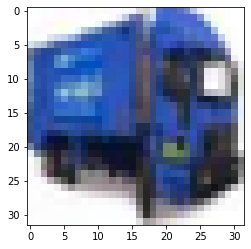

In [ ]:
plt.imshow(X_train[5002])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


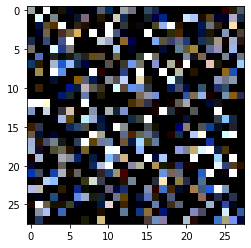

In [ ]:
plt.imshow(mod_X_train[5002])

## Etapa 4: Construindo a Rede Neural Convolucional

### Definindo o modelo

In [ ]:
model = tf.keras.models.Sequential()

### Adicionado a primeira camada de convolução

Hyper-parâmetros da camada de convolução:
- filters (filtros): 32
- kernel_size (tamanho do kernel): 3
- padding (preenchimento): same
- função de ativação: relu
- input_shape (camada de entrada): (32, 32, 3)


In [ ]:
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[28, 28, 3]))

### Adicionando a segunda camada de convolução e a camada de max-pooling

Hyper-parâmetros da camada de convolução:
- filters (filtros): 32
- kernel_size (tamanho do kernel):3
- padding (preenchimento): same
- função de ativação: relu

Hyper-parâmetros da camada de max-pooling:
- pool_size: 2
- strides: 2
- padding: valid

In [ ]:
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"))

In [ ]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

### Adicionando a terceira camada de convolução

Hyper-parâmetros da camada de convolução:

    filters: 64
    kernel_size:3
    padding: same
    activation: relu


In [ ]:
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))

###  Adicionando a quarta camada de convolução e a camada de max pooling

Hyper-parâmetros da camada de convolução:

    filters: 64
    kernel_size:3
    padding: same
    activation: relu

Hyper-parâmetros da camada de max pooling:

    pool_size: 2
    strides: 2
    padding: valid


In [ ]:
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))

In [ ]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

### Adicionando a camada de flattening

In [ ]:
model.add(tf.keras.layers.Flatten())

### Adicionando a primeira camada densa (fully-connected)

Hyper-parâmetros da camada densa:
- units/neurônios: 128
- função de ativação: relu

In [ ]:
model.add(tf.keras.layers.Dense(units=300, activation='relu'))

In [ ]:
model.add(tf.keras.layers.Dropout(0.3))

### Adicionando a camada de saída

Hyper-parâmetros da camada de saída:

 - units/neurônios: 10 (número de classes)
 - activation: softmax


In [ ]:
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)             

### Compilando o modelo

#### sparse_categorical_accuracy

https://stackoverflow.com/questions/44477489/keras-difference-between-categorical-accuracy-and-sparse-categorical-accuracy 

In [ ]:
# 0 0 0 1 0 0 0 0 0 0
y_test[0]

array([3], dtype=uint8)

In [ ]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["sparse_categorical_accuracy"])

### Treinando o modelo

In [ ]:
model.fit(mod_X_train, y_train, epochs=10)

Train on 50000 samples
Epoch 1/10
50000/50000 [==============================] - 7s 144us/sample - loss: 1.4867 - sparse_categorical_accuracy: 0.4882
Epoch 2/10
50000/50000 [==============================] - 7s 141us/sample - loss: 1.3548 - sparse_categorical_accuracy: 0.5247
Epoch 3/10
50000/50000 [==============================] - 7s 141us/sample - loss: 1.2818 - sparse_categorical_accuracy: 0.5443
Epoch 4/10
50000/50000 [==============================] - 7s 140us/sample - loss: 1.2076 - sparse_categorical_accuracy: 0.5673
Epoch 5/10
50000/50000 [==============================] - 7s 141us/sample - loss: 1.1460 - sparse_categorical_accuracy: 0.5875
Epoch 6/10
50000/50000 [==============================] - 7s 142us/sample - loss: 1.0836 - sparse_categorical_accuracy: 0.6108
Epoch 7/10
50000/50000 [==============================] - 7s 146us/sample - loss: 1.0228 - sparse_categorical_accuracy: 0.6317
Epoch 8/10
50000/50000 [==============================] - 7s 146us/sample - loss: 0.9630

### Avaliando o modelo

In [ ]:
test_loss, test_accuracy = model.evaluate(mod_X_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [ ]:
print("Test accuracy: {}".format(test_accuracy))

Test accuracy: 0.5022000074386597


In [ ]:
test_loss

1.612709171295166